<a href="https://colab.research.google.com/github/chelsea-riwash/Email-Spam-Detection-using-NB-classifier/blob/main/Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv('/content/emails.csv')

In [4]:
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


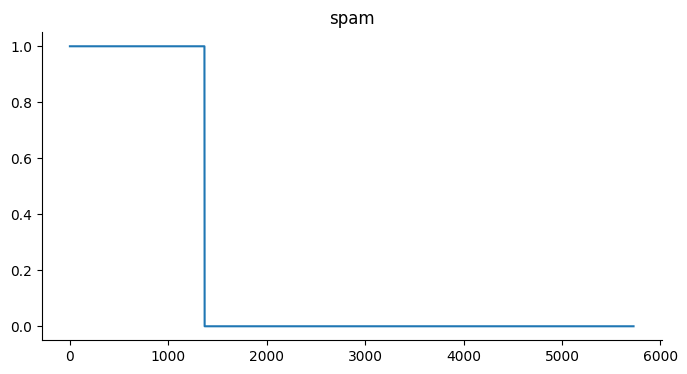

In [5]:
# @title spam

from matplotlib import pyplot as plt
dataset['spam'].plot(kind='line', figsize=(8, 4), title='spam')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['text'])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, dataset['spam'], test_size=0.2)

In [9]:
model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [10]:
yPred = model.predict(X_test)

accuracy = accuracy_score(Y_test,yPred)

print(accuracy)

0.9895287958115183


In [27]:
def predictMessage(message):
  messageVector = vectorizer.transform([message])
  prediction = model.predict(messageVector)
  return 'Spam' if prediction[0] == 1 else 'Not Spam'


userMessage = input('Enter text to predict: ')
prediction = predictMessage(userMessage)
print(f'The message is: {prediction}')

Enter text to predict: Hi Riwash,     We appreciate your interest in the position at UXCam. It was a pleasure to get to know you.     Unfortunately, after careful evaluation of you profile and based on the information we collected during the HR interview, we have considered all our options and while we are really impressed by your background and expertise, we need a bit different knowledge for this position and therefore we will not move forward with your application this time. We have many well-qualified candidates and have decided to progress with those whose experience more directly aligns with the requirements for this role.   We encourage you to keep an eye on our career opportunities (here), and there may be future positions that align more closely with your skills set.    Best of luck with your search and thanks again for your interest in UXCam.   If you have any queries, please do not hesitate to contact us.   Best wishes,  UXCam Recruitment Team  
The message is: Not Spam
